In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
fg = pd.read_csv('/content/fear_greed_index.csv')
fg.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
fg.isnull().sum()
fg.duplicated().sum()
fg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [ ]:
fg['date'] = pd.to_datetime(fg['date'])

In [ ]:
fg['classification'].value_counts()

,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [ ]:
mapping = {
    "Extreme Fear" : 1,
    "Fear" : 2,
    "Neutral" : 3 ,
    "Greed" : 4 ,
    "Extreme Greed" : 5
}
fg['sentiment_num'] = fg['classification'].map(mapping)

In [ ]:
fg.head()

,timestamp,value,classification,date,sentiment_num
0,1517463000,30,Fear,2018-02-01,2
1,1517549400,15,Extreme Fear,2018-02-02,1
2,1517635800,40,Fear,2018-02-03,2
3,1517722200,24,Extreme Fear,2018-02-04,1
4,1517808600,11,Extreme Fear,2018-02-05,1


In [ ]:
hist = pd.read_csv('/content/historical_data.csv')
hist.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
hist['Direction'].value_counts()

,count
Direction,
Open Long,49895
Close Long,48678
Open Short,39741
Close Short,36013
Sell,19902
Buy,16716
Spot Dust Conversion,142
Short > Long,70
Long > Short,57


In [ ]:
hist.duplicated().sum()
hist.info()
hist.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [ ]:
hist['Timestamp IST'] = pd.to_datetime(hist['Timestamp IST'],format='%d-%m-%Y %H:%M')

**Feature Engineering**

1. Time-Based Features

In [ ]:
hist['trade_hr'] = hist['Timestamp IST'].dt.hour
hist['trade_date'] =hist['Timestamp IST'].dt.date

In [ ]:
hist['day_of_week'] = hist['Timestamp IST'].dt.dayofweek
hist['day_of_week']

,day_of_week
0,0
1,0
2,0
3,0
4,0
...,...
211219,4
211220,4
211221,4
211222,4


In [ ]:
print(hist[['Timestamp IST','trade_hr','trade_date','day_of_week']].head())

        Timestamp IST  trade_hr  trade_date  day_of_week
0 2024-12-02 22:50:00        22  2024-12-02            0
1 2024-12-02 22:50:00        22  2024-12-02            0
2 2024-12-02 22:50:00        22  2024-12-02            0
3 2024-12-02 22:50:00        22  2024-12-02            0
4 2024-12-02 22:50:00        22  2024-12-02            0


2. Trade Size & Value Features

In [ ]:
# log_trade_value → compresses very large trades so the ML model isn’t dominated by outliers.
hist['log_trade_value'] = np.log1p(hist['Size USD'])

In [ ]:
# relative_trade_size → compares a trade’s value to the trader’s personal average (helps identify “big” or “small” trades for each account).
hist['relative_trade_size'] = hist.groupby('Account')['Size USD'].transform(
    lambda x: x / x.mean())

3. Trader Behavior Features

In [ ]:
hist['side_encoded'] = hist['Side'].map({'BUY': 1, 'SELL': 0})
hist['direction_encoded'] = hist['Direction'].map({'BUY': 1, 'SELL': 0})

In [ ]:
# Define custom mapping for trader behavior
direction_map = {
    'Open Long': 'open_long',
    'Close Long': 'close_long',
    'Open Short': 'open_short',
    'Close Short': 'close_short',
    'Buy': 'spot_buy',
    'Sell': 'spot_sell',
    'Spot Dust Conversion': 'other',
    'Short > Long': 'flip',
    'Long > Short': 'flip',
    'Auto-Deleveraging': 'forced_exit',
    'Liquidated Isolated Short': 'forced_exit',
    'Settlement': 'settlement'
}

# Map into clean categories
hist['direction_clean'] = hist['Direction'].map(direction_map)

# Encode numerically for ML
hist['direction_encoded'] = hist['direction_clean'].astype('category').cat.codes

4. Performance Features

In [ ]:
# Normalized return per trade ROI
hist['Normalized_return'] = hist['Closed PnL'] / hist['Size USD']* 100

In [ ]:
hist['Closed_PnL_num'] = hist['Closed PnL'].apply(lambda x:1 if x > 0 else 0)

5. Market Sentiment Features

In [ ]:
hist['trade_date'] = pd.to_datetime(hist['trade_date'])
fg['date'] = pd.to_datetime(fg['date'])

hist = hist.merge(fg[['value','classification','date','sentiment_num']],
                  left_on='trade_date', right_on='date', how='left')

In [ ]:
hist.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,relative_trade_size,side_encoded,direction_encoded,direction_clean,Normalized_return,Closed_PnL_num,value,classification,date,sentiment_num
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,2.642159,1,8,spot_buy,0.0,0,80.0,Extreme Greed,2024-12-02,5.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,0.042854,1,8,spot_buy,0.0,0,80.0,Extreme Greed,2024-12-02,5.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,0.386190,1,8,spot_buy,0.0,0,80.0,Extreme Greed,2024-12-02,5.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,0.383307,1,8,spot_buy,0.0,0,80.0,Extreme Greed,2024-12-02,5.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,0.023410,1,8,spot_buy,0.0,0,80.0,Extreme Greed,2024-12-02,5.0


In [ ]:
hist['greed_buy_volume'] = np.where(
    ((hist['sentiment_num'] == 5 )| (hist['sentiment_num'] == 4 )) & (hist['side_encoded'] == 1),
    hist['Size USD'], 0
)

In [ ]:
# Sell volume during Fear
hist['fear_sell_volume'] = np.where(
    ((hist['sentiment_num'] == 1 ) | (hist['sentiment_num'] == 2 )) & (hist['side_encoded'] == 0),
    hist['Size USD'], 0
)

In [ ]:
# Sentiment-weighted trade size
hist['sentiment_weighted_trade'] = hist['Size USD'] * hist['sentiment_num']

In [ ]:
# Cumulative PnL under each sentiment per account (optional)
hist['cum_pnl_greed'] = hist.groupby(['Account'])['Closed PnL'].cumsum() * hist['sentiment_num']
hist['cum_pnl_fear'] = hist.groupby(['Account'])['Closed PnL'].cumsum() * (1 - hist['sentiment_num'])

In [ ]:
# PnL correlation with sentiment per trader (optional, can be computed later)
# Example: one-time calculation after grouping
pnl_sentiment_corr = hist.groupby('Account').apply(
    lambda x: x['Closed PnL'].corr(x['sentiment_num'])
).reset_index().rename(columns={0:'pnl_sentiment_corr'})

/tmp/ipython-input-1382859586.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pnl_sentiment_corr = hist.groupby('Account').apply(


In [ ]:
# Merge correlation back to hist
hist = hist.merge(pnl_sentiment_corr, on='Account', how='left')

In [ ]:
print(hist[['Account','side_encoded','Size USD','sentiment_num',
            'greed_buy_volume','fear_sell_volume','sentiment_weighted_trade','pnl_sentiment_corr']].head())

                                      Account  side_encoded  Size USD  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed             1   7872.16   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed             1    127.68   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed             1   1150.63   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed             1   1142.04   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed             1     69.75   

   sentiment_num  greed_buy_volume  fear_sell_volume  \
0            5.0           7872.16               0.0   
1            5.0            127.68               0.0   
2            5.0           1150.63               0.0   
3            5.0           1142.04               0.0   
4            5.0             69.75               0.0   

   sentiment_weighted_trade  pnl_sentiment_corr  
0                  39360.80            0.096807  
1                    638.40            0.096807  
2                   5753.15            0.096807  
3                   5710

**EDA**

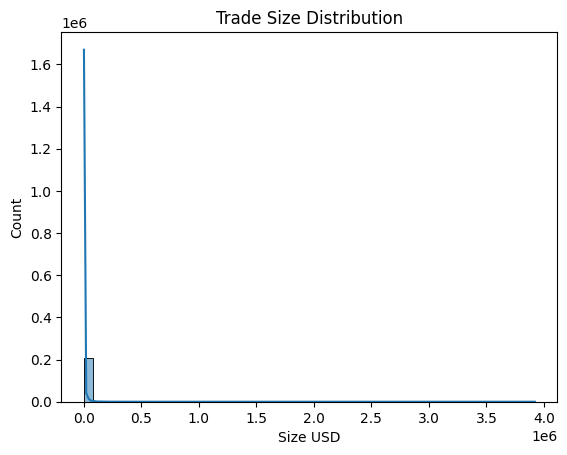

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Distribution of trade size (USD)
sns.histplot(hist['Size USD'], bins=50, kde=True)
plt.title('Trade Size Distribution')
plt.show()

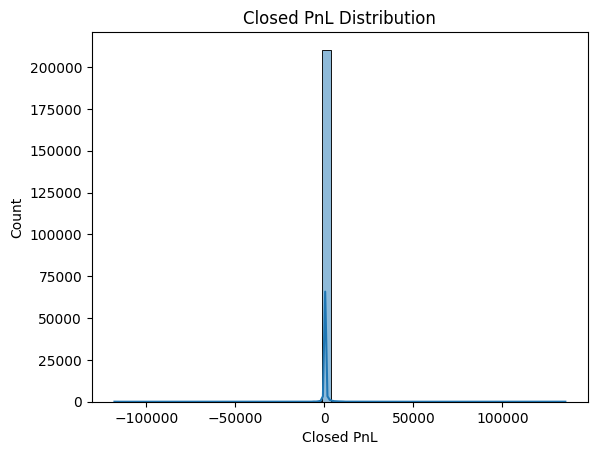

In [ ]:
sns.histplot(hist['Closed PnL'], bins=50, kde=True)
plt.title('Closed PnL Distribution')
plt.show()

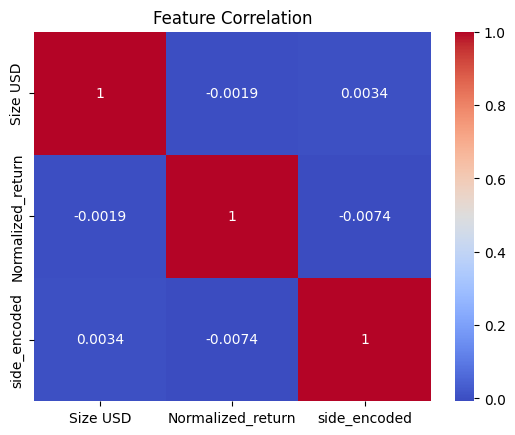

In [ ]:
corr_matrix = hist[['Size USD','Normalized_return','side_encoded']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Separate trades by sentiment
fear_trades = hist[hist['sentiment_num']==0]['Closed PnL']
greed_trades = hist[hist['sentiment_num']==1]['Closed PnL']


# T-test: is mean PnL different between Fear vs Greed?
t_stat, p_val = ttest_ind(fear_trades, greed_trades, nan_policy='omit')
print(f"T-statistic: {t_stat}, p-value: {p_val}")

T-statistic: nan, p-value: nan


/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [ ]:
hist['win'] = (hist['Closed PnL'] > 0).astype(int)
winrate_by_sentiment = hist.groupby('classification')['win'].mean()
print(winrate_by_sentiment)

classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: win, dtype: float64


In [ ]:
# Net position change = Size Tokens × (+1 for Buy, -1 for Sell)
hist['position_size_tokens'] = pd.to_numeric(hist['Size Tokens'], errors='coerce')
hist['net_position_change'] = hist['position_size_tokens'] * hist['side_encoded'].replace({0: -1})
hist['net_position_change'].head()

,net_position_change
0,986.87
1,16.00
2,144.09
3,142.98
4,8.73


In [ ]:
hist['trade_date'] = pd.to_datetime(hist['Timestamp IST']).dt.date
hist['account_activity'] = hist.groupby(['Account','trade_date'])['Trade ID'].transform('count')

**Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
features = ['Size USD','side_encoded','net_position_change','account_activity','sentiment_num']
X = hist[features]
y = (hist['Closed PnL'] > 0).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9020949224760326
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     24802
           1       0.89      0.87      0.88     17443

    accuracy                           0.90     42245
   macro avg       0.90      0.90      0.90     42245
weighted avg       0.90      0.90      0.90     42245



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

clustering_features = ['Size USD','side_encoded','account_activity']
X_cluster = hist[clustering_features].fillna(0)
X_scaled = StandardScaler().fit_transform(X_cluster)

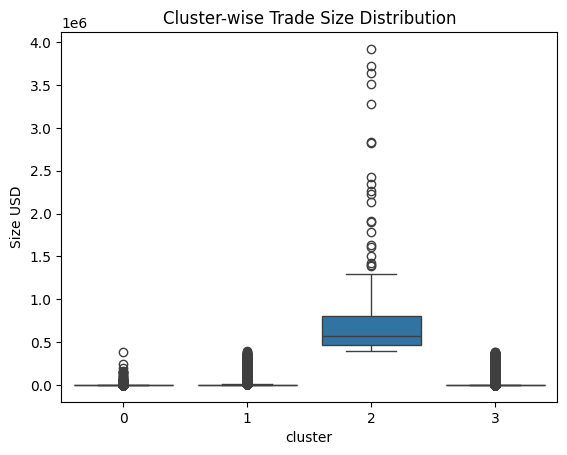

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
hist['cluster'] = kmeans.fit_predict(X_scaled)

# Inspect clusters
sns.boxplot(x='cluster', y='Size USD', data=hist)
plt.title('Cluster-wise Trade Size Distribution')
plt.show()

In [1]:
import pandas as pd

df = pd.read_csv("/content/historical_data.csv")

# Take first 1000 rows
sample = df.head(1000)

sample.to_csv("Trader_History_Sample.csv", index=False)
